<a href="https://colab.research.google.com/github/Taha-Sami/season1-practice5/blob/main/practice5_season1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("possum.csv")

In [5]:
df_nans_filled=df.fillna(df.mean())

<ipython-input-5-03878f72b251>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nans_filled=df.fillna(df.mean())


In [6]:
df_remove=df_nans_filled.drop(labels=["case","site","Pop","sex"],axis=1)
df_x=df_remove.drop(labels=["age"],axis=1)
df_y=df_remove[["age"]]

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
X_nrm=scaler.fit_transform(df_x)
y=df_y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_val, y_train, y_val=train_test_split(X_nrm,y,test_size=0.2)

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model= Sequential()

In [97]:
model.add(Dense(128,activation='LeakyReLU',input_shape=x_train.shape[1:]))
model.add(Dense(32,activation='ReLU'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss="mse",metrics="acc")
result=model.fit(x_train,y_train,epochs=30, validation_data=(x_val,y_val),batch_size=32)

Epoch 1/30
3/3 [==============================] - 9s 237ms/step - loss: 15.3730 - acc: 0.0120 - val_loss: 10.8181 - val_acc: 0.0952
Epoch 2/30
3/3 [==============================] - 0s 38ms/step - loss: 10.6163 - acc: 0.0964 - val_loss: 7.0509 - val_acc: 0.0952
Epoch 3/30
3/3 [==============================] - 0s 26ms/step - loss: 6.7652 - acc: 0.0964 - val_loss: 4.5401 - val_acc: 0.0952
Epoch 4/30
3/3 [==============================] - 0s 27ms/step - loss: 4.4597 - acc: 0.0964 - val_loss: 3.6645 - val_acc: 0.0952
Epoch 5/30
3/3 [==============================] - 0s 23ms/step - loss: 3.5010 - acc: 0.0964 - val_loss: 3.9340 - val_acc: 0.0952
Epoch 6/30
3/3 [==============================] - 0s 24ms/step - loss: 3.6782 - acc: 0.0964 - val_loss: 4.4909 - val_acc: 0.0952
Epoch 7/30
3/3 [==============================] - 0s 32ms/step - loss: 4.0600 - acc: 0.0964 - val_loss: 4.7015 - val_acc: 0.0952
Epoch 8/30
3/3 [==============================] - 0s 32ms/step - loss: 4.1431 - acc: 0.0964 -

In [98]:
yhat_test=model.predict(x_val)

1/1 [==============================] - 0s 349ms/step


In [99]:
import matplotlib.pyplot as plt

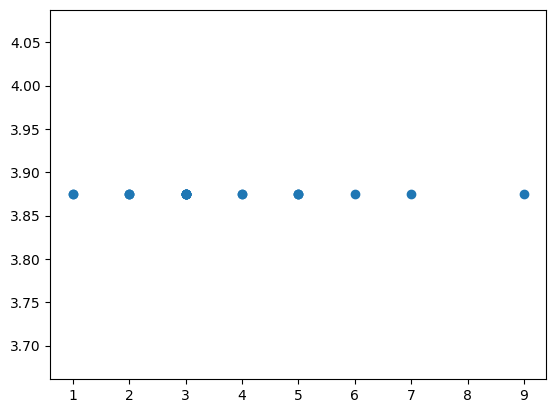

In [100]:
plt.scatter(y_val,yhat_test)

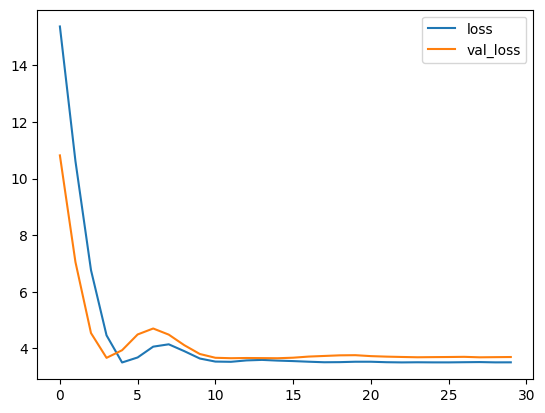

In [101]:
plt.plot(result.history["loss"],label="loss")
plt.plot(result.history["val_loss"],label="val_loss")
plt.legend()